In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications
import numpy as np

In [2]:
ROWS=224
COLS=224
train_idg = ImageDataGenerator(vertical_flip=True,
                               horizontal_flip=True,
                               height_shift_range=0.1,
                               width_shift_range=0.1,
                               preprocessing_function=preprocess_input)
train_gen = train_idg.flow_from_directory(
    '../input/datatask2/task2/train',
    target_size=(ROWS, COLS),
    batch_size = 64,
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1/255)
val_gen = val_datagen.flow_from_directory(
    '../input/datatask2/task2/val',
    target_size=(ROWS, COLS),
    batch_size = 16
)

Found 14465 images belonging to 3 classes.
Found 1808 images belonging to 3 classes.


In [8]:
train_gen.class_indices

{'humanitarian': 0, 'non_informative': 1, 'structure': 2}

In [9]:
class_weights={0:2.0657,1:0.536,2:1.53448}

In [11]:

input_shape = (ROWS, COLS, 3)
nclass = len(train_gen.class_indices)

base_model = tf.keras.applications.Xception(weights='imagenet', 
                                include_top=False, 
                                input_shape=(ROWS, COLS,3))
'''for layers in base_model.layers:
    if layers.name.find('bn')!=-1:
        layers.trainable=True
    else:
        layers.trainable=False'''

base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
'''add_model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3)))
add_model.add(BatchNormalization())
add_model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
add_model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3)))
add_model.add(BatchNormalization())
add_model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
'''
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(nclass, 
                    activation='softmax'))

model = add_model
metrics = METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precison"),
    tf.keras.metrics.Recall(name="recall")
]
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=metrics)
model.summary()
import tensorflow.keras as keras


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 20,867,627
Trainable params: 6,147
Non-trainable params: 20,861,480
_________________________________________________________________


In [12]:
file_path="weights.best.hdf5"

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = keras.callbacks.ModelCheckpoint('best_model_alt-loss-xception.h5', monitor='loss', mode='min', save_best_only=True)
ms = keras.callbacks.ModelCheckpoint('best_model_alt-valloss-xception.h5', monitor='val_loss', mode='min', save_best_only=True)

callbacks_list = [es, mc,ms] #early


history = model.fit(train_gen,
                              validation_data=val_gen, 
                              epochs=100, 
                              shuffle=True, 
                              verbose=True,
                                class_weight=class_weights,
                              callbacks=callbacks_list)

2022-05-11 11:40:23.567990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-05-11 11:40:28.612182: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


227/227 [==============================] - 392s 2s/step - loss: 0.6042 - accuracy: 0.4803 - precison: 0.5418 - recall: 0.3027 - val_loss: 0.5237 - val_accuracy: 0.6532 - val_precison: 0.7441 - val_recall: 0.5017


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
227/227 [==============================] - 304s 1s/step - loss: 0.5153 - accuracy: 0.6298 - precison: 0.6775 - recall: 0.5385 - val_loss: 0.4639 - val_accuracy: 0.7041 - val_precison: 0.7542 - val_recall: 0.6211
Epoch 3/100
227/227 [==============================] - 303s 1s/step - loss: 0.4814 - accuracy: 0.6716 - precison: 0.7040 - recall: 0.6093 - val_loss: 0.4341 - val_accuracy: 0.7273 - val_precison: 0.7646 - val_recall: 0.6665
Epoch 4/100
227/227 [==============================] - 307s 1s/step - loss: 0.4667 - accuracy: 0.6857 - precison: 0.7134 - recall: 0.6397 - val_loss: 0.4285 - val_accuracy: 0.7212 - val_precison: 0.7545 - val_recall: 0.6731
Epoch 5/100
227/227 [==============================] - 304s 1s/step - loss: 0.4572 - accuracy: 0.6959 - precison: 0.7207 - recall: 0.6566 - val_loss: 0.4246 - val_accuracy: 0.7212 - val_precison: 0.7532 - val_recall: 0.6820
Epoch 6/100
227/227 [==============================] - 308s 1s/step - loss: 0.4501 - accuracy: 0.6978 - 

In [13]:
savemodel = tf.keras.models.load_model('best_model_alt-loss-xception.h5')

In [15]:
import os
predicted=[]
real=[]
for dir in os.listdir("../input/datatask2/task2/test"):
    if dir=='humanitarian':
        r=0
    elif dir =='non_informative':
        r=1
    else:
        r=2
    for path in os.listdir(f'../input/datatask2/task2/test/{dir}'):
        p=f'../input/datatask2/task2/test/{dir}/{path}'
        img = tf.keras.utils.load_img(
    p, target_size=(224, 224)
)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        img_array=preprocess_input(img_array)

        predictions = savemodel.predict(img_array)
        real.append(r)
        predicted.append(np.argmax(predictions))
for dir in os.listdir("../input/datatask2/task2/val"):
    if dir=='humanitarian':
        r=0
    elif dir =='non_informative':
        r=1
    else:
        r=2
    for path in os.listdir(f'../input/datatask2/task2/val/{dir}'):
        p=f'../input/datatask2/task2/val/{dir}/{path}'
        img = tf.keras.utils.load_img(
    p, target_size=(224, 224)
)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        img_array=preprocess_input(img_array)

        predictions = savemodel.predict(img_array)
        real.append(r)
        predicted.append(np.argmax(predictions))

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [16]:
from sklearn import metrics
print(metrics.classification_report(real,predicted))
print(metrics.confusion_matrix(real,predicted))

              precision    recall  f1-score   support

           0       0.52      0.75      0.62       583
           1       0.91      0.74      0.82      2248
           2       0.65      0.80      0.72       786

    accuracy                           0.75      3617
   macro avg       0.70      0.76      0.72      3617
weighted avg       0.79      0.75      0.76      3617

[[ 438   88   57]
 [ 313 1657  278]
 [  90   66  630]]


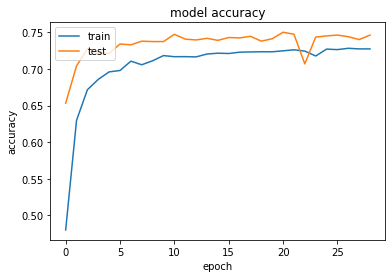

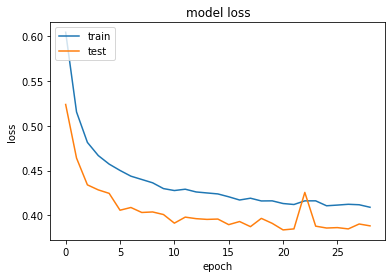

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
import seaborn as sebrn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as atlas

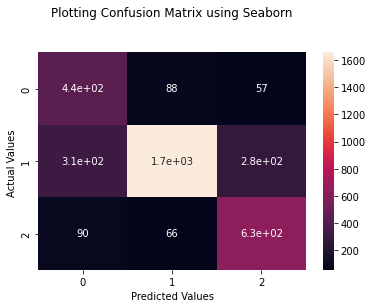

In [19]:
conf_matrix = (confusion_matrix(real, predicted))

# Using Seaborn heatmap to create the plot
fx = sebrn.heatmap(conf_matrix, annot=True)

# labels the title and x, y axis of plot
fx.set_title('Plotting Confusion Matrix using Seaborn\n\n');
fx.set_xlabel('Predicted Values')
fx.set_ylabel('Actual Values ');

# labels the boxes
